# 로지스틱 회귀
* 로지스틱 회귀 알고리즘에 대한 이해
* 이진 분류 문제에서 클래스 확률 예측

### 지난 시간에
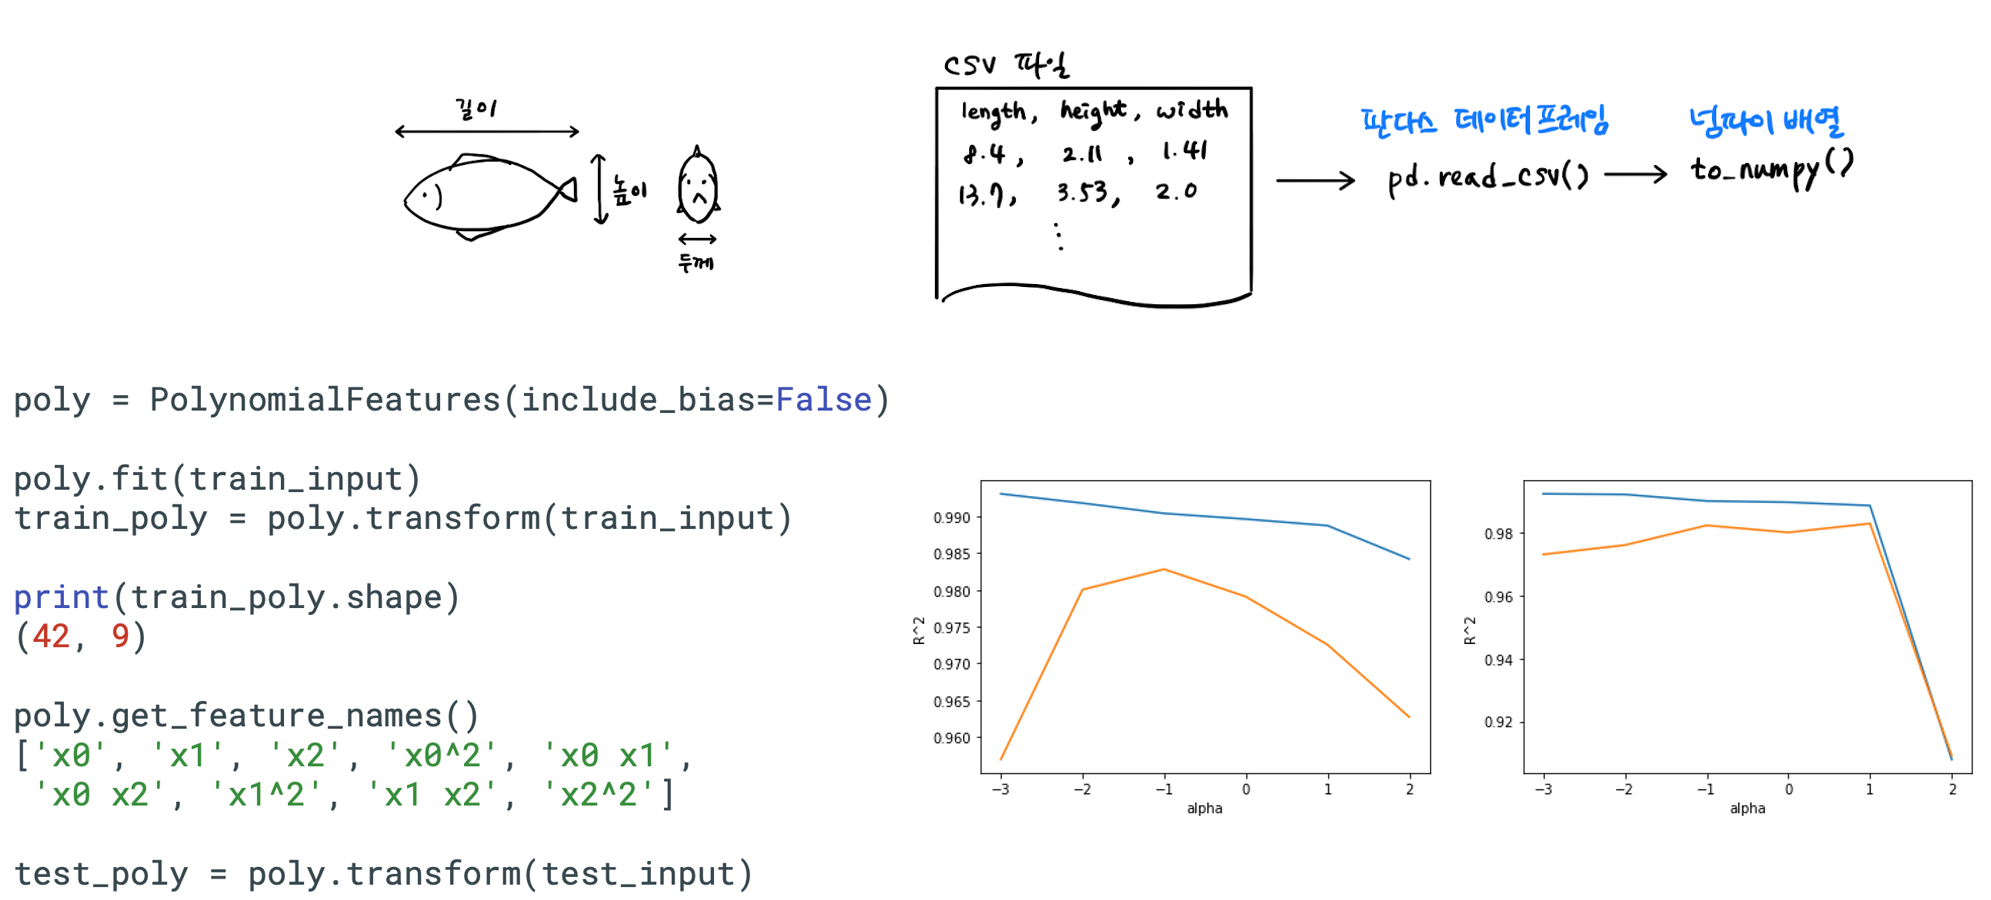

### 새로운 이벤트의 기획 (럭키백)
* 생선 종류를 모른채 구매하고, 배송받은 다음에 생선 종류 확인 가능한 이벤트

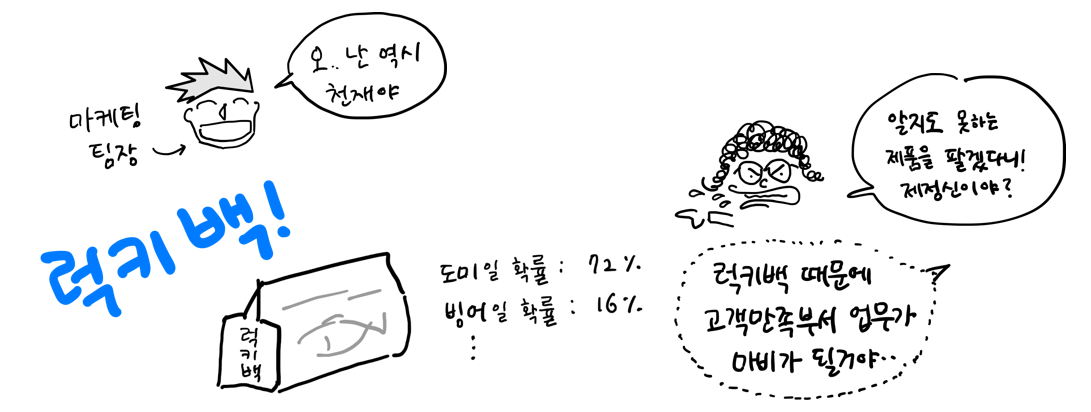

---
* 아무런 정보 없이 구매한 고객의 불만 발생 여지
* 럭키백에 담길 **생선의 확률 표시** 하여 해결

### 럭키백의 확률 계산하기

* 생선의 종류는 7개로 한정
* 생선의 **길이, 높이, 두께, 대각선 길이, 무게**를 이용하여 생선의 확률 계산

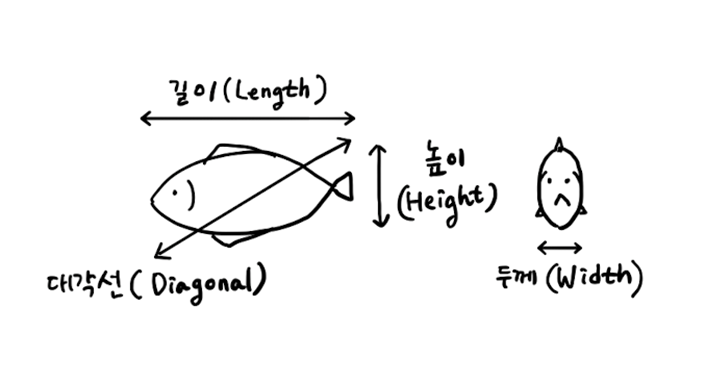

---
* k-최근접 이웃의 클래스별 비율을 확률로 계산하는 것으로 접근
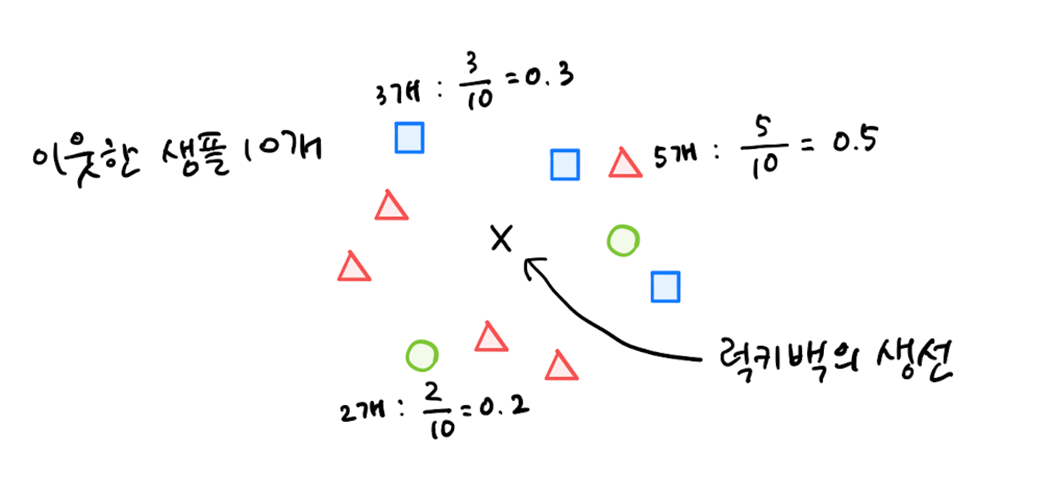

#### [데이터 준비하기]
* [사용될 csv 데이터 다운로드]https://bit.ly/fish_csv_data
  - 총 159마리의 생선에 대해 6개의 정보를 열로 표시 : Species(생선종류), Weight(무게), Length(길이), Diagonal(대각선), Height(높이), Width(두께)

In [6]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


* 어떤 종류의 생선이 있는지 확인

In [8]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

* Species 열을 타깃으로 만들고 나머지 5개의 열은 입력 데이터로 사용
  - 입력 데이터 이름 : Weight(무게), Length(길이), Diagonal(대각선), Height(높이), Width(두께)

In [10]:
# 입력 데이터 생성
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [11]:
# 타깃 데이터 생성
fish_target = fish['Species'].to_numpy()
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

* 데이터를 훈련 세트와 테스트 세트로 분리

In [13]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

* 훈련 세트와 테스트 세트를 표준화 전처리
  - 훈련 세트의 통계 값으로 테스트 세트를 변환해야 함
  - StandardScaler.fit(train_input) 한 번만 호출

In [15]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

#### [k-최근접 이웃 분류기의 확률 예측]
* KNeighborsClassifier 클래스를 이용하여 훈련

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [18]:
kn.score(train_scaled, train_target)

0.8907563025210085

In [19]:
kn.score(test_scaled, test_target)

0.85

#### 다중 분류(multi-class classification) 문제 : 타깃 데이터가 2개 이상의 클래스가 포함된 문제
* 7 종류의 생선 종류가 타깃 데이터에 포함되어 있음

In [21]:
# KNeighborsClassifier에서 사용하는 타깃값 확인 (알파벳 순으로 정렬)
kn.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

* 테스트 세트에 있는 처음 5개 샘플의 타깃값 예측

In [23]:
kn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

* 클래스별 확률값 확인

In [25]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5]) # 클래스별 확률값 반환
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

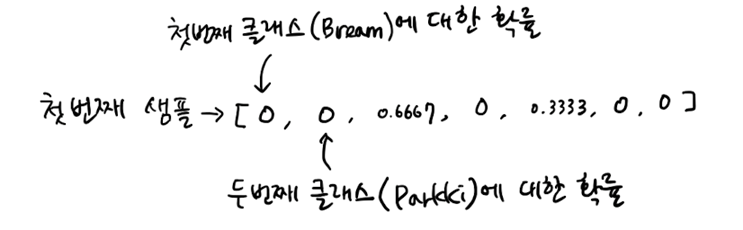

In [27]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
train_target[indexes]

# Roach에 대한 확률 : 1/3 = 0.3333
# Perch에 대한 확률 : 2/3 = 0.6667

array([['Roach', 'Perch', 'Perch']], dtype=object)

#### 이렇게 럭키백의 확률을 표시하면 완벽할까?
* k-최근접 이웃 알고리즘을 사용하여 가까운 3개의 이웃에 대해서만 확률 계산
* 가능한 확률은? ==> 0/3, 1/3, 2/3, 3/3이 전부

### 로지스틱 회귀(Logistic Regression)
* 선형 회귀 방식을 분류에 적용한 알고리즘
* 데이터가 어떤 범주에 속할 확률을 0 ~ 1사이의 값으로 예측
* 더 높은 범주에 속하는 쪽으로 분류
  - 범주 : True/False, Yes/No, 합격/불합격, ...
  - 예) 스팸 메일, 은행 대출, 악성 여부, 고객의 제품 구매 의사, ...
* 선형 회귀와 동일한 **선형 방정식을 이용하여 학습**
  - a, b, c, d, e : 가중치 (계수)
  - **z : 확률이므로 0 ~ 1 (0 ~ 100%) 사이의 값이 되어야 함**
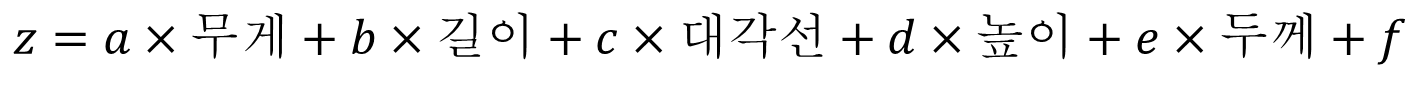

---
* **시그모이드(Sigmoid) 함수** = 로지스틱(Logistic) 함수
  - z가 아주 큰 음수일 때 0이 되고, z가 아주 큰 양수일 때 1이 되도록 값을 계산하는 함수

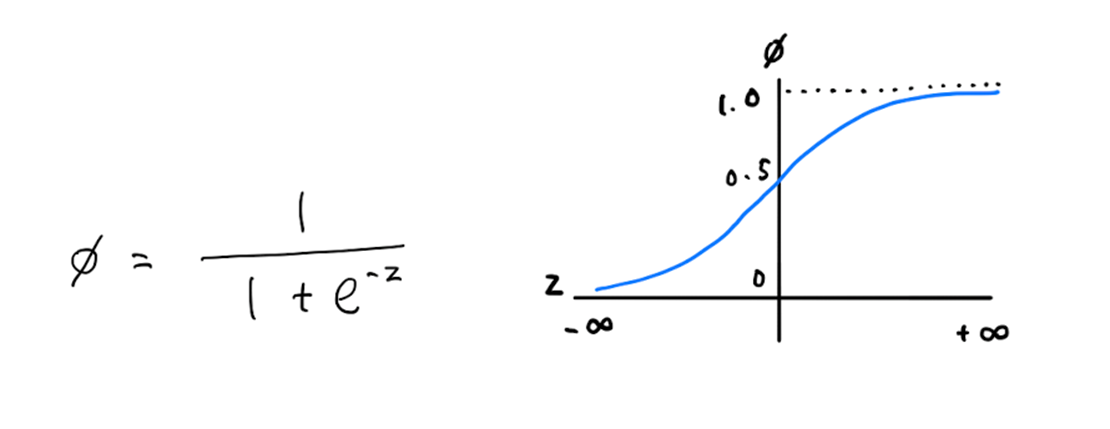

* 넘파이를 활용한 시그모이드 그래프 시각화

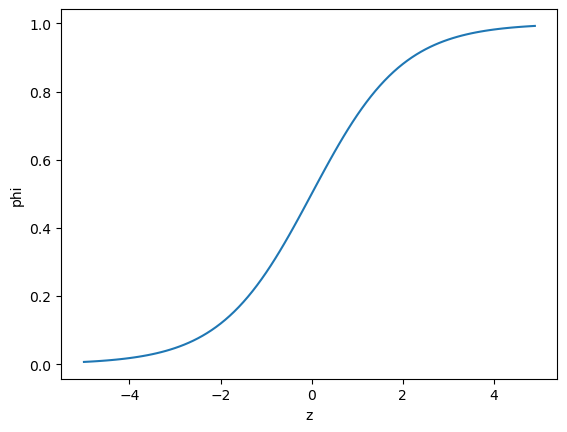

In [31]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

#### [로지스틱 회귀로 이진 분류 수행하기]

* **불리언 인덱싱(boolean indexing)** : True, False 값을 전달하여 원하는 행 선택

In [34]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


* 훈련 세트에서 도미(Bream)와 빙어(Smelt)에 해당하는 행만 추출

In [36]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

* **LogisticRegression 클래스**를 이용한 로지스틱 회귀 모델 훈련

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

* 훈련한 모델을 사용해 train_bream_smelt에 있는 처음 5개 샘플의 생선 예측

In [40]:
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

* train_bream_smelt에 있는 처음 5개 샘플의 예측 확률 출력

In [42]:
lr.predict_proba(train_bream_smelt[:5])

# 첫번째 열이 0, 두번째 열이 1에 대한 확률
# 사이킷런은 타깃값을 알파벳순으로 오름차순 정렬

array([[0.99760007, 0.00239993],
       [0.02737325, 0.97262675],
       [0.99486386, 0.00513614],
       [0.98585047, 0.01414953],
       [0.99767419, 0.00232581]])

In [43]:
lr.classes_

# 0 : Bream (농어)
# 1 : Smelt (빙어)

array(['Bream', 'Smelt'], dtype=object)

* 계수와 절편값을 이용하여 로지스틱 회귀 모델이 학습한 방정식 도출 가능
  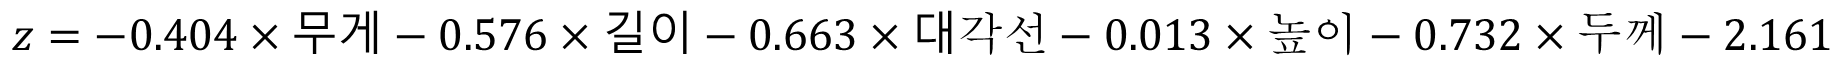

In [45]:
lr.coef_, lr.intercept_

(array([[-0.40451732, -0.57582787, -0.66248158, -1.01329614, -0.73123131]]),
 array([-2.16172774]))

* **decision_function()** 메서드를 이용하여 z값 계산 가능

In [47]:
decisions = lr.decision_function(train_bream_smelt[:5])
decisions

array([-6.02991358,  3.57043428, -5.26630496, -4.24382314, -6.06135688])

* z값을 시그모이드 함수에 적용한 값 계산
  - scipy 라이브러리에 시그모이드 함수 사용 가능 : expit()

In [49]:
from scipy.special import expit

expit(decisions)

# predict_proba() 메서드 출력의 두번째 열의 값과 동일
# ==> decision_function() 메서드는 양성 클래스(1)에 대한 z값 반환

array([0.00239993, 0.97262675, 0.00513614, 0.01414953, 0.00232581])

#### [로지스틱 회귀 모델의 성능 평가 지표]
* 선형 회귀 모델은 실제값과 예측값의 오차에 기반한 지표를 사용
* 로지스틱 회귀 모델은 이진 분류 결과를 평가하기 위해 오차 행렬에 기반한 성능 지표인 **정밀도, 재현율, F1 스코어, ROC_AUC**를 사용

#### 오차 행렬(confusion matrix)과 정확도
* 행렬을 사용해 이진 분류의 예측 오류를 나타내는 지표
* 행은 실제 클래스의 Negative/Positive 값,  열은 예측 클래스의 Negative/ Positive 
    - TN: Negative가 참인 경우
    - TP: Positive가 참인 경우
    - FN: Negative가 거짓인 경우
    - FP: Positive가 거짓인 경우

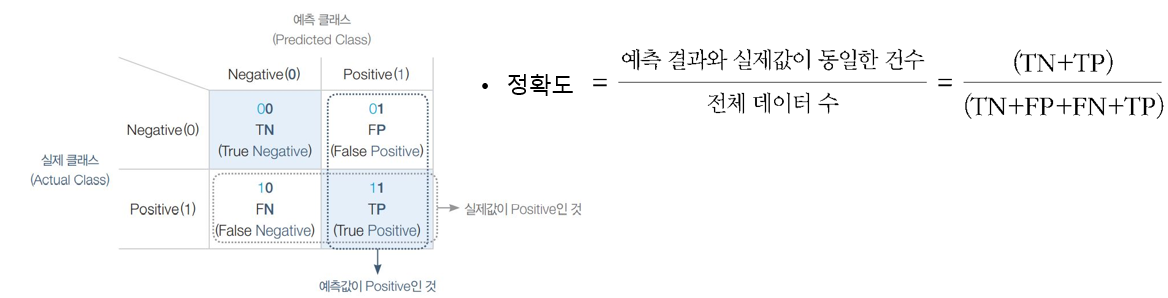

* 사이킷런에서는 오차 행렬을 구하기 위해 confusion_matrix 함수를 제공

#### 정밀도
* 예측이 Positive인 것(FP+TP) 중에서, 참인 것(TP)의 비율을 의미
* 정밀도는 Positive 예측 성능을 더 정밀하게 평가하기 위한 지표로 사용
* 사이킷런에서는 정밀도를 구하기 위해 precision_score 함수를 제공
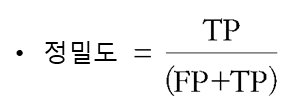

#### 재현율
* 실제값이 Positive인 것(FN+TP) 중에서 참인 것(TP)의 비율을 의미
* 실제 Positive인 데이터를 정확히 예측했는지 평가하는 지표 (민감도 또는 TPR)
* 사이킷런에서는 재현율을 구하기 위해 recall_score 함수를 제공
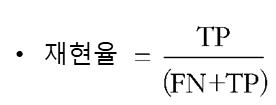

#### F1 스코어
* 정밀도와 재현율을 결합한 평가 지표
* 정밀도와 재현율이 서로 트레이드 오프 관계(상충 관계)인 문제점을 고려하여 정확한 평가를 위해 많이 사용
* 사이킷런에서는 F1 스코어를 구하기 위해 f1_score 함수를 제공
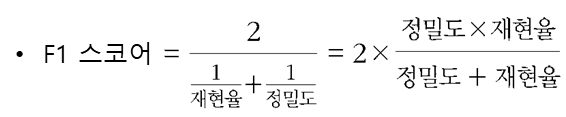

#### ROC 기반 AUC 스코어
* 오차 행렬의 FPR이 변할 때 TPR이 어떻게 변하는지를 나타내는 곡선
    - FPR: 실제 Negative인 데이터를 Positive로 거짓False으로 예측한 비율
    - TPR: 실제 Positive인 데이터를 참True으로 예측한 비율(재현율)
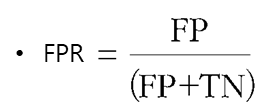

* ROC(Receiver Operation characteristic Curve) 기반의 AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로 1에 가까울수록 좋은 성능을 의미
* 사이킷런에서는 ROC 기반의 AUC를 구하기 위해 roc_auc_score 함수를 제공

---

* **도미, 빙어만 포함된 테스트 데이터의 오차 행렬 구하기**

In [102]:
from sklearn.metrics import confusion_matrix

test_bs_indexes = (test_target == 'Bream') | (test_target == 'Smelt')
test_bs = test_scaled[test_bs_indexes]
test_bs_target = test_target[test_bs_indexes]

cm = confusion_matrix(test_bs_target, lr.predict(test_bs))
cm

array([[11,  0],
       [ 0,  5]], dtype=int64)

#### [로지스틱 회귀로 다중 분류 수행하기]
* LogisticRegression() 클래스를 사용해 이중 분류와 동일하게 다중 분류도 수행 가능
  - **C** : 규제 강도 (작을 수록 규제 세짐). 기본값은 1.0
  - **max_iter** : 반복 횟수 제한 (수렴까지). 기본값은 100
  - **penalty** : 규제(regurization)의 종류 (l1, l2, elasticnet, none). 기본값은 'l2' - 릿지 회귀
  - **solver** : 최적화 알고리즘(liblinear, lbfgs, newton-cg, saga, sag). 기본값은 'lbfgs'
  - **multi_class** : 다중 클래스 설정 방법 ('ovr' : 일대다(One-vs-Rest), 'multinomial' : 소프트맥스 기반). 기본값은 'auto'

In [104]:
# 규제강도20, 반복횟수 1000으로 설정하여 로지스틱 회귀 모델 생성
lr = LogisticRegression(C=20, max_iter = 1000)
# 7개의 생선 종류 전부 포함하고 표준화된 데이터를 사용하여 훈련
lr.fit(train_scaled, train_target)


LogisticRegression(C=20, max_iter=1000)

In [106]:
lr.score(train_scaled, train_target)

0.9327731092436975

In [108]:
lr.score(test_scaled, test_target)

0.925

* 훈련한 모델을 사용해 test_scaled에 있는 처음 5개 샘플의 생선 예측

In [114]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [116]:
test_target[:5]

array(['Perch', 'Smelt', 'Pike', 'Whitefish', 'Perch'], dtype=object)

* train_bream_smelt에 있는 처음 5개 샘플의 예측 확률 출력

In [118]:
proba =lr.predict_proba(test_scaled[:5])
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])

In [120]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

* **다중 분류 모델의 혼동행렬 구하기**
  - 클래스들 중 하나를 Positive 기준으로 삼고, 나머지를 Negative 기준으로 두는 이진 분류 모델 생성
  - 사이킷런의 **multilabel_confusion_matrix 함수** 사용

In [124]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(test_target, lr. predict(test_scaled))
#classes 갯수 = matrix 갯
mcm

array([[[29,  0],
        [ 0, 11]],

       [[38,  0],
        [ 0,  2]],

       [[27,  1],
        [ 0, 12]],

       [[36,  0],
        [ 0,  4]],

       [[35,  2],
        [ 0,  3]],

       [[35,  0],
        [ 0,  5]],

       [[37,  0],
        [ 3,  0]]], dtype=int64)

* 계수와 절편값을 이용하여 로지스틱 회귀 모델이 학습한 방정식 도출 가능
  - **다중 분류는 클래스마다 z 값을 하나씩 계산**
* 다중 분류에서는 **소프트맥스(softmax)** 함수를 사용하여 z값을 확률로 변환
  - 여러 개의 선형방정식의 출력값을 0 ~ 1 사이로 압축하고 전체 합이 1이 되도록 생성
  - 지수 함수를 사용하기 때문에 정규화된 지수 함수라고 함
  - (예) 7개의 분류 클래스(7개의 z값 : z1 ~ z7)가 있는 경우 소프트맥스 함수 계산
    * $e\_sum = e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7}$
    * $s1 = \frac{e^{z1}}{e\_sum}, s2 = \frac{e^{z2}}{e\_sum}, s3 = \frac{e^{z3}}{e\_sum}, s4 = \frac{e^{z4}}{e\_sum}, s5 = \frac{e^{z5}}{e\_sum}, s6 = \frac{e^{z6}}{e\_sum}, s7 = \frac{e^{z7}}{e\_sum}, $
    * $s1$에서 $s7$까지 합 : 1 (모두 더하면 분자와 분모가 같아지므로)

In [130]:
lr.coef_.shape, lr.intercept_.shape
# 5개의 특성을 사용하므로 coef_ 배열의 열 :5
# 7개의 클래스에 대해 각각 z값 계산 :7

((7, 5), (7,))

* **decision_function() 메서드**를 이용하여 z1 ~ z7 값 계산 가능

In [128]:
decision = lr.decision_function(test_scaled[:5])
np.round(decision, decimals=2)

array([[ -6.51,   1.04,   5.17,  -2.76,   3.34,   0.35,  -0.63],
       [-10.88,   1.94,   4.78,  -2.42,   2.99,   7.84,  -4.25],
       [ -4.34,  -6.24,   3.17,   6.48,   2.36,   2.43,  -3.87],
       [ -0.69,   0.45,   2.64,  -1.21,   3.26,  -5.7 ,   1.26],
       [ -6.4 ,  -1.99,   5.82,  -0.13,   3.5 ,  -0.09,  -0.7 ]])

* z1 ~ z7 값을 소프트맥스 함수에 적용한 값 계산
  - scipy 라이브러리에 소프트맥스 함수 사용 가능 : softmax()

In [132]:
from scipy.special import softmax

#axis = 1: 소프트맥스를 계산할 축 지정
# -1 : 각 행(샘픔)에 대해 소프트맥스 계산
proba = softmax(decision, axis =1)
np.round(proba, decimals=3)

array([[0.   , 0.014, 0.842, 0.   , 0.135, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.934, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.305, 0.006, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])